In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.2.6 Get the City Weather Data

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
import json

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

755

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | mutoko
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | tubruq
City not found. Skipping...
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | corinto
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | toungoo
City not found. Skipping..

Processing Record 36 of Set 4 | kununurra
Processing Record 37 of Set 4 | rio do sul
Processing Record 38 of Set 4 | qandala
Processing Record 39 of Set 4 | batemans bay
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | qixingtai
Processing Record 44 of Set 4 | vengerovo
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | jeremie
Processing Record 47 of Set 4 | xam nua
Processing Record 48 of Set 4 | naze
Processing Record 49 of Set 4 | nemuro
Processing Record 50 of Set 4 | kloulklubed
Processing Record 1 of Set 5 | debre birhan
Processing Record 2 of Set 5 | kalmunai
Processing Record 3 of Set 5 | mrirt
City not found. Skipping...
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | bud
Processing Record 7 of Set 5 | mareeba
Processing Record 8 of Set 5 | solnechnyy
Processing Record 9 of Set 5

Processing Record 27 of Set 8 | eenhana
Processing Record 28 of Set 8 | norwalk
Processing Record 29 of Set 8 | udachnyy
Processing Record 30 of Set 8 | yerbogachen
Processing Record 31 of Set 8 | xanxere
Processing Record 32 of Set 8 | arlit
Processing Record 33 of Set 8 | gurupa
Processing Record 34 of Set 8 | robertson
Processing Record 35 of Set 8 | arkhangelsk
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | seoul
Processing Record 38 of Set 8 | the valley
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | yellowknife
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | raudeberg
Processing Record 43 of Set 8 | tubuala
Processing Record 44 of Set 8 | manzanillo
Processing Record 45 of Set 8 | vardo
Processing Record 46 of Set 8 | igarka
Processing Record 47 of Set 8 | sao miguel do tapuio
Processing Record 48 of Set 8 | pak phanang
Processing Record 49 of Set 8 | kavaratti
Processing Record 50 of Set 8 | tokur
Proc

Processing Record 20 of Set 12 | asfi
Processing Record 21 of Set 12 | anito
Processing Record 22 of Set 12 | yekaterinovka
Processing Record 23 of Set 12 | vysokogornyy
Processing Record 24 of Set 12 | ust-omchug
Processing Record 25 of Set 12 | porto walter
Processing Record 26 of Set 12 | kodinsk
Processing Record 27 of Set 12 | prince george
Processing Record 28 of Set 12 | puerto madero
Processing Record 29 of Set 12 | jackson
Processing Record 30 of Set 12 | la palma
Processing Record 31 of Set 12 | lompoc
Processing Record 32 of Set 12 | severnyy
Processing Record 33 of Set 12 | vila
Processing Record 34 of Set 12 | paris
Processing Record 35 of Set 12 | borogontsy
Processing Record 36 of Set 12 | carballo
Processing Record 37 of Set 12 | pangnirtung
Processing Record 38 of Set 12 | pedra branca
Processing Record 39 of Set 12 | moerai
Processing Record 40 of Set 12 | stokmarknes
Processing Record 41 of Set 12 | coracora
Processing Record 42 of Set 12 | ahipara
Processing Record 

In [10]:
#type(city_data)
len(city_data)

707

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,69.01,86,8,9.19,ZA,2021-01-17 17:47:33
1,Mutoko,-17.3970,32.2268,70.57,93,100,5.10,ZW,2021-01-17 17:47:33
2,College,64.8569,-147.8028,10.40,72,90,2.17,US,2021-01-17 17:47:33
3,Mataura,-46.1927,168.8643,42.71,92,66,4.03,NZ,2021-01-17 17:47:34
4,Albany,42.6001,-73.9662,37.99,68,97,14.56,US,2021-01-17 17:42:40
5,Tuktoyaktuk,69.4541,-133.0374,-2.20,84,90,10.36,CA,2021-01-17 17:47:34
6,Puerto Ayora,-0.7393,-90.3518,82.40,65,75,5.75,EC,2021-01-17 17:47:34
7,Nikolskoye,59.7035,30.7861,19.40,93,90,4.47,RU,2021-01-17 17:47:35
8,Upernavik,72.7868,-56.1549,6.98,79,0,4.12,GL,2021-01-17 17:47:35
9,Lebu,-37.6167,-73.6500,61.88,68,0,21.41,CL,2021-01-17 17:47:35


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

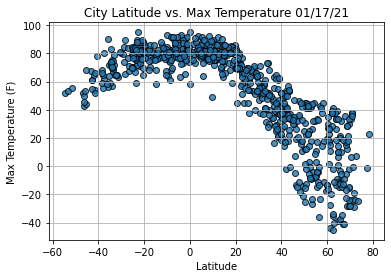

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

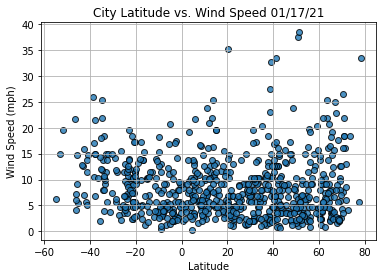

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

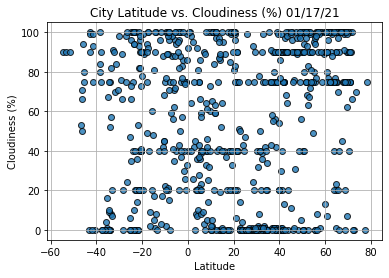

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


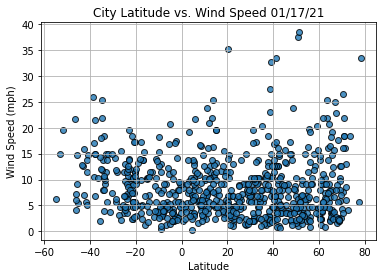

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,College,64.8569,-147.8028,10.40,72,90,2.17,US,2021-01-17 17:47:33
4,Albany,42.6001,-73.9662,37.99,68,97,14.56,US,2021-01-17 17:42:40
5,Tuktoyaktuk,69.4541,-133.0374,-2.20,84,90,10.36,CA,2021-01-17 17:47:34
7,Nikolskoye,59.7035,30.7861,19.40,93,90,4.47,RU,2021-01-17 17:47:35
8,Upernavik,72.7868,-56.1549,6.98,79,0,4.12,GL,2021-01-17 17:47:35
...,...,...,...,...,...,...,...,...,...
699,Qui Nhon,13.7667,109.2333,70.50,79,95,25.30,VN,2021-01-17 17:49:39
700,Mao,39.8885,4.2658,51.80,71,20,4.61,ES,2021-01-17 17:49:40
703,Iralaya,15.0000,-83.2333,80.94,78,100,11.45,HN,2021-01-17 17:49:40
705,Sibi,29.5448,67.8764,59.79,29,0,1.90,PK,2021-01-17 17:49:40


In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,College,64.8569,-147.8028,10.40,72,90,2.17,US,2021-01-17 17:47:33
4,Albany,42.6001,-73.9662,37.99,68,97,14.56,US,2021-01-17 17:42:40
5,Tuktoyaktuk,69.4541,-133.0374,-2.20,84,90,10.36,CA,2021-01-17 17:47:34
7,Nikolskoye,59.7035,30.7861,19.40,93,90,4.47,RU,2021-01-17 17:47:35
8,Upernavik,72.7868,-56.1549,6.98,79,0,4.12,GL,2021-01-17 17:47:35


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

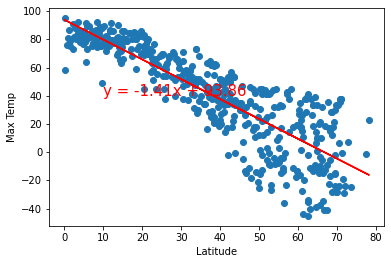

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


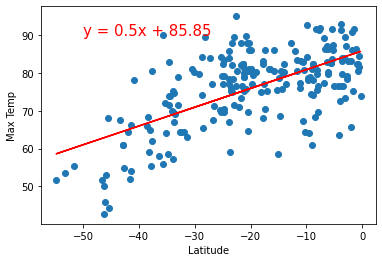

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

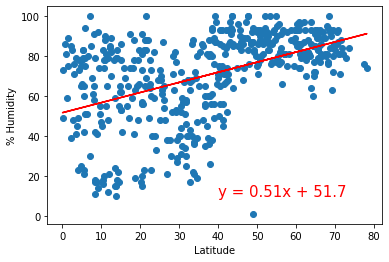

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

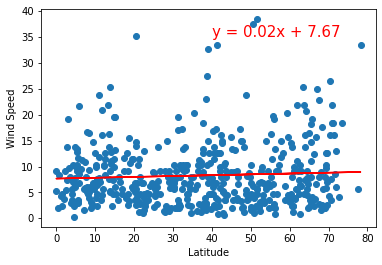

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))
